In [6]:
import os
import shutil
import random
import glob
from tqdm import tqdm



subject ID: xxx

image number: xxx

gender: 0 - male 1 - famale

glasses: 0 - no 1 - yes

eye state: 0 - close 1 - open

reflections: 0 - none 1 - low 2 - high

lighting conditions/image quality: 0 - bad 1 - good

sensor type: 01 - RealSense SR300 640x480 02 - IDS Imaging, 1280x1024 03 - Aptina Imagin 752x480

example: s001_00123_0_0_0_0_0_01.png

In [2]:
Raw_DIR= r'C:\projects\Deep Learning\DriverDetection dataset\mrlEyes_2018_01'
for dirpath, dirname, filenames in os.walk(Raw_DIR):
    for i in tqdm([f for f in filenames if f.endswith('.png')]):
        if i.split('_')[4]=='0':
            shutil.copy(src=dirpath+'/'+i, dst=r'C:\projects\Deep Learning\DriverDetection dataset\Train Data\Closed eyes')
        
        elif i.split('_')[4]=='1':
            shutil.copy(src=dirpath+'/'+i, dst=r'C:\projects\Deep Learning\DriverDetection dataset\Train Data\Open Eyes')

0it [00:00, ?it/s]
100%|██████████| 10257/10257 [08:57<00:00, 19.08it/s] 


In [7]:
def create_test_closed(source, destination, percent):
    '''
    divides closed eyes images into given percent and moves from
    source to destination.
    
    Arguments:
    source(path): path of source directory
    destination(path): path of destination directory
    percent(float): percent of data to be divided(range: 0 to 1)
    '''
    path, dirs, files_closed = next(os.walk(source))
    file_count_closed = len(files_closed)
    percentage = file_count_closed * percent
    to_move = random.sample(glob.glob(source + "/*.png"), int(percentage))

    for f in enumerate(to_move):
        if not os.path.exists(destination):
            os.makedirs(destination)
        shutil.move(f[1], destination)
    print(f'moved {int(percentage)} images to the destination successfully.') 

In [8]:
def create_test_open(source, destination, percent):
    '''
    divides open eyes images into given percent and moves from
    source to destination.
    
    Arguments:
    source(path): path of source directory
    destination(path): path of destination directory
    percent(float): percent of data to be divided(range: 0 to 1)
    '''
    path, dirs, files_open = next(os.walk(source))
    file_count_open = len(files_open)
    percentage = file_count_open * percent
    to_move = random.sample(glob.glob(source + "/*.png"), int(percentage))

    for f in enumerate(to_move):
        if not os.path.exists(destination):
            os.makedirs(destination)
        shutil.move(f[1], destination)
    print(f'moved {int(percentage)} images to the destination successfully.')

In [ ]:
create_test_closed(r'C:\projects\Deep Learning\DriverDetection dataset\Train Data\Closed eyes', 
                    r'C:\projects\Deep Learning\DriverDetection dataset\test data\Closed Eyes', 
                    0.2)

In [ ]:
create_test_open(r'C:\projects\Deep Learning\DriverDetection dataset\Train Data\Open Eyes', 
                    r'C:\projects\Deep Learning\DriverDetection dataset\test data\Open Eyes', 
                    0.2)

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import  Conv2D, Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [2]:
batchsize=8

# Image Normalisation/ Image Augumentation

In [3]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'C:\projects\Deep Learning\DriverDetection dataset\Train Data',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'C:\projects\Deep Learning\DriverDetection dataset\Train Data',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 54336 images belonging to 2 classes.
Found 13583 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'C:\projects\Deep Learning\DriverDetection dataset\test data',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 16979 images belonging to 2 classes.


# Model Training

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import  Conv2D, Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [6]:
#Initalising the CNN
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=256,padding="same",kernel_size=3,activation='relu',input_shape=[80,80,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=128,padding="same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=64,padding="same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        1

# Resource Optimization

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [9]:
checkpoint = ModelCheckpoint(r'C:\projects\Deep Learning\DriverDetection dataset\ModelBuild\model.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [ ]:
cnn.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history=cnn.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=10)

Epoch 1/10
6792/6792 [==============================] - ETA: 0s - loss: 0.3307 - accuracy: 0.8474
Epoch 00001: val_loss improved from inf to 0.40810, saving model to C:\projects\Deep Learning\DriverDetection dataset\ModelBuild\model.h5
6792/6792 [==============================] - 6721s 990ms/step - loss: 0.3307 - accuracy: 0.8474 - val_loss: 0.4081 - val_accuracy: 0.8494
Epoch 2/10
6792/6792 [==============================] - ETA: 0s - loss: 0.1334 - accuracy: 0.9512
Epoch 00002: val_loss improved from 0.40810 to 0.34647, saving model to C:\projects\Deep Learning\DriverDetection dataset\ModelBuild\model.h5
6792/6792 [==============================] - 13619s 2s/step - loss: 0.1334 - accuracy: 0.9512 - val_loss: 0.3465 - val_accuracy: 0.8618
Epoch 3/10
6792/6792 [==============================] - ETA: 0s - loss: 0.1025 - accuracy: 0.9633
Epoch 00003: val_loss improved from 0.34647 to 0.21852, saving model to C:\projects\Deep Learning\DriverDetection dataset\ModelBuild\model.h5
6792/6792 

A Look at an example of closedEye image

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from array import array

In [2]:
img_array =cv2.imread(r'C:\projects\Deep Learning\DriverDetection dataset\test data\Closed Eyes\s0001_00014_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)


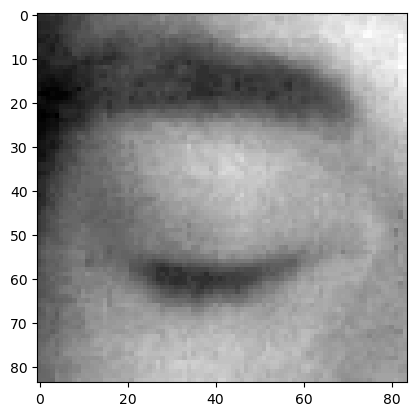

In [3]:
plt.imshow(img_array,cmap="gray")

Resizing image

In [4]:
backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgb,(80,80))

In [5]:
x_input=np.array(new_array).reshape(1,80,80,3)

In [6]:
x_input.shape

(1, 80, 80, 3)

In [7]:
x_input = x_input/255.0

# Loading Model

In [43]:
model = load_model(r'C:\projects\Deep Learning\DriverDetection dataset\modelBuild\model.h5')

# Model Prediction

In [11]:
prediction = model.predict(x_input)

In [12]:
prediction

array([[9.9940646e-01, 5.9351348e-04]], dtype=float32)

SINCE WE USED SOFTMAX AS THE ACTIVATION FUNCTION, CLOOSED EYES HAS THE HIGHEST PROBABILITY. 

In [57]:
img=cv2.imread(r'C:\projects\Deep Learning\DriverDetection dataset\test data\Open Eyes\s0001_01859_0_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)


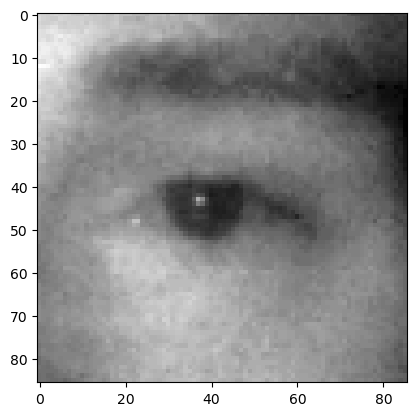

In [58]:
plt.imshow(img,cmap="gray")

In [59]:
backtorgb2= cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new_img=cv2.resize(backtorgb2,(80,80))

In [60]:
new_img=np.array(new_img).reshape(1,80,80,3)

In [61]:
x_input2 = new_img/255.0

In [62]:
prediction1 = model.predict(x_input2)
prediction1

array([[0.00787103, 0.99212897]], dtype=float32)